# Lab 4 - Tree-based Learning: Classifiying Particle Physics Data

In this lab, you will learn to:
* Build a decision tree manually
* Build a classifer using random forest with sklearn
* Visualize decision trees
* Build regression model using random forest
* Learn about additional performance metrics and hyper-parameter tuning. 
* Build a classifier for particle physics data

Authors: Tuan Do & Bernie Boscoe

Latest Revision: Tuan Do

In [1]:
# put your imports here
import numpy as np
import pandas as pd
import pylab as plt
import sklearn as sk
import matplotlib.pyplot as plt
import math

# Part A - Building a decision tree by hand

From Question 2 from Chapter 4 of Kelleher 


A convicted criminal who reoffends after release is known as a recidivist. The table below lists a dataset that describes prisoners released on parole, and whether they reoffended within two years of release. This dataset lists six instances where prisoners were granted parole. Each of these instances are described in terms of three binary descriptive features. (GOOD BEHAVIOR, AGE ă 30, DRUG DEPENDENT) and a binary target feature, RECIDIVIST. The GOOD BEHAVIOR feature has a value of true if the prisoner had not committed any infringements during incarceration, the AGE ă 30 has a value of true if the prisoner was under 30 years of age when granted parole, and the DRUG DEPENDENT feature is true if the prisoner had a drug addiction at the time of parole. The target feature, RECIDIVIST, has a true value if the prisoner was arrested within two years of being released; otherwise it has a value of false.


<img src="table.png" alt="drawing" width="600"/>

Note: This example of predicting recidivism is based on a real application of machine learning: parole boards do rely on machine learning prediction models to help them when they are making their decisions. See Berk and Bleich (2013) for a recent comparison of different machine learning models used for this task. Datasets dealing with prisoner recidivism are available online, for exam- ple: catalog.data.gov/dataset/prisoner-recidivism/. The dataset presented here is not based on real data.


### Part A1

### Question 1
(5 pts)

Using this dataset, construct the decision tree that would be generated by the ID3 algorithm, using entropy-based information gain. Show your calculations for information gain and draw your final tree. Hint: follow the example in 4.3.1 in Kelleher. Note, you can upload a separate PDF for this question if you would like to draw or calculate on paper. 

In [2]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform

In [3]:
'''
REMEBER TO IMPORT THE PDF FOR THE DECISION TREE FOR QUESTION 1'''

'\nREMEBER TO IMPORT THE PDF FOR THE DECISION TREE FOR QUESTION 1'

### Part A2

### Question 2
(1 pt)

What prediction will the decision tree generated in part 1.1 return for the following query?
GOOD BEHAVIOR = false,AGE < 30 = false, DRUG DEPENDENT = true

The decision tree will predict that the the person is a Recidivist

### Part A3

### Question 3

(1 pt)

What prediction will the decision tree generated in part 1.1 predict for the following query?

GOOD BEHAVIOR = true,AGE > 30 = true, DRUG DEPENDENT = false

The prediction will predict that the person is a Recidivist

### Part A4 

### Question 4
(1 pt)

Discuss why this decision tree might lead to biases in inferences about recividism.

The potential biases in inferences about recidivism based on a decision tree can arise from several sources such as the quality and representativeness of the data used to train the model, the choice of features and their interpretation, and the structure and complexity of the decision tree.

Some Possible sources:
The quality and representiveness of the data used to train the model. If data is bais or incomplete, the model can make decisions based on irrelevant or misleading features correlated to the target but not related to it

The choice of features and their interpretation. If model includes features that are baised the algorithm can amplify that bias.


The structure and complexity of the decision tree can also lead to biases in inferences about recidivism. If the decision tree is too complex or too overfit to the training data, it can be overly sensitive to noise and outliers in the data, and produce unreliable or wrong predictions.

# Part B - Classify irises with a decision tree

Here, we'll repeat the iris classification problem with a decision tree using continuous features. We'll also be using the sklearn decision tree classifier.  


In [4]:
# load the data and the module to visualize decision trees
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import accuracy_score
from sklearn import datasets, model_selection
import pandas as pd
import seaborn as sns
%matplotlib inline

## B1 Building a decision tree with 2 features



## Question 5

(1 pt)

Load the iris data set. Let's start by using only **2 features: sepal length and width**


In [5]:
# enter code here, hint: use your code from  your previous labs to load the iris dataset
iris1 = datasets.load_iris()
data1 = pd.DataFrame(data= np.c_[iris1['data'], iris1['target']],
                     columns= iris1['feature_names'] + ['target'])

iris = iris1.data[:,:2]

targets = iris1.target
print(data1)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  

**Split the data into training and testing data**

In [6]:
# enter code here
x_train_all, x_validate, y_train_all, y_validate = model_selection.train_test_split(iris, targets, test_size=0.1)

# now split the training data further into training and testing
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_train_all, y_train_all, test_size=0.2)



## Question 6
(2 pts)

**Load the classifier**

See the sklearn documentation for more info: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [7]:
# load the classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
print(iris.shape)
print(targets.shape)
print(x_train.shape)


(150, 2)
(150,)
(108, 2)


**Train the classifier**

In [8]:
# enter your code here
clf = DecisionTreeClassifier(random_state = 0)

decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(x_train,y_train)


In [9]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

**Visualize your decision tree.** Sklearn has a nice function called tree.plot_tree that will plot the tree you created. 

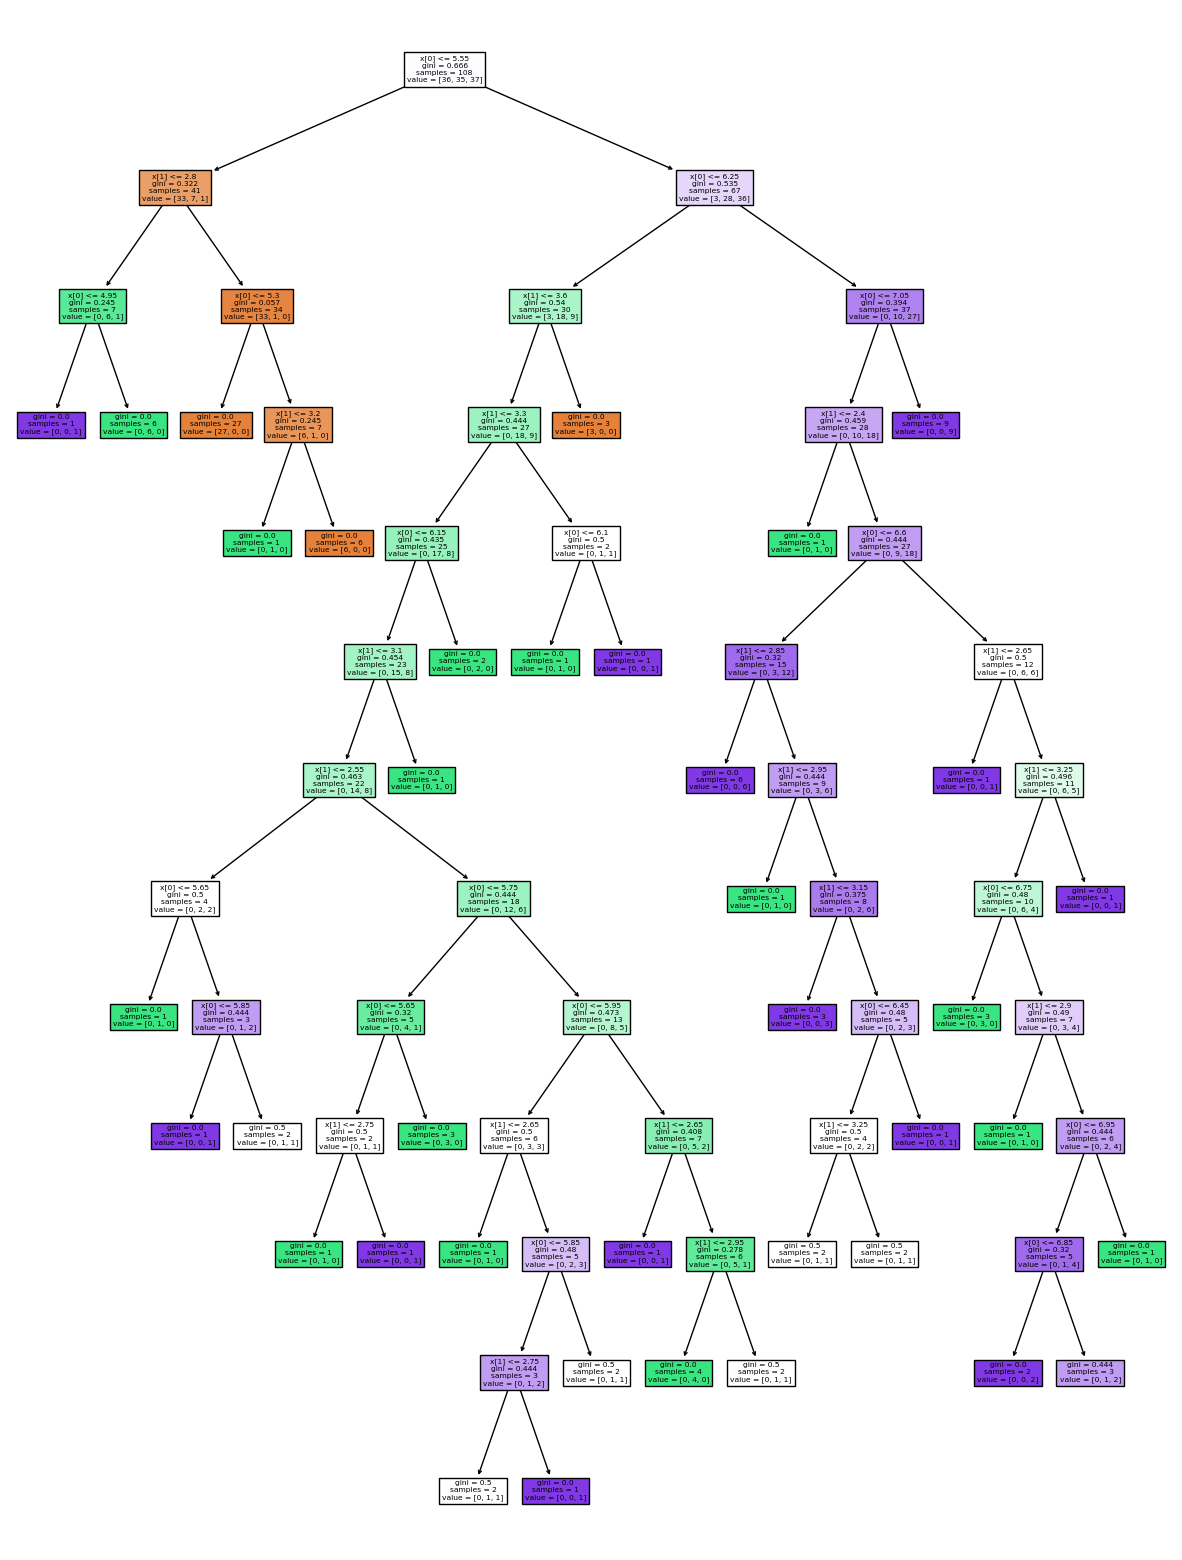

In [10]:
# visualize the tree that was created
plt.figure(figsize=(15,20))
t = tree.plot_tree(clf,filled=True)

## Question 7
(2 pts)

Describe the tree that you created. **Where which feature did the root node use to split? Why? How deep is it? Why is it that deep?**

In [11]:
importances = decision_tree.feature_importances_
print(importances)

#The importances of the tree are as following:
#sepal length (cm): 0.59037526
#sepal width(cm):   0.40962474
#The decision tree's depth ranges between 11 and 13. Every time it is ran, the depth of the 
#tree will change. The main feature that the tree used to split is the sepal length. 
#The reason why it used the sepal length to split is because it has a higher importance value
#when compared to the sepal width.

[0.61145318 0.38854682]


Test the classifier using the **accuracy score**.

In [12]:
# enter your code here.
tree_pred = clf.predict(x_test)
score = accuracy_score(y_test,tree_pred)
print(score)
print(tree_pred)
print(y_test)

#The accuracy score is 70%


0.5925925925925926
[1 1 2 2 2 1 2 1 1 1 2 0 0 2 2 1 0 1 1 2 1 2 0 2 0 1 2]
[1 1 1 2 0 2 1 1 2 1 1 0 0 2 2 2 0 2 2 1 1 2 0 2 0 1 1]


**Visualization:** we can visualize how different pairs of iris features would give in terms of their classification in the iris problem. **Run the code cell below to see this decision surface for different pairs of features.** 

/tmp/ipykernel_942/1378001726.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_942/1378001726.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_942/1378001726.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_942/1378001726.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_942/1378001726.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],


(0.0, 7.88, -0.9, 3.4800000000000044)

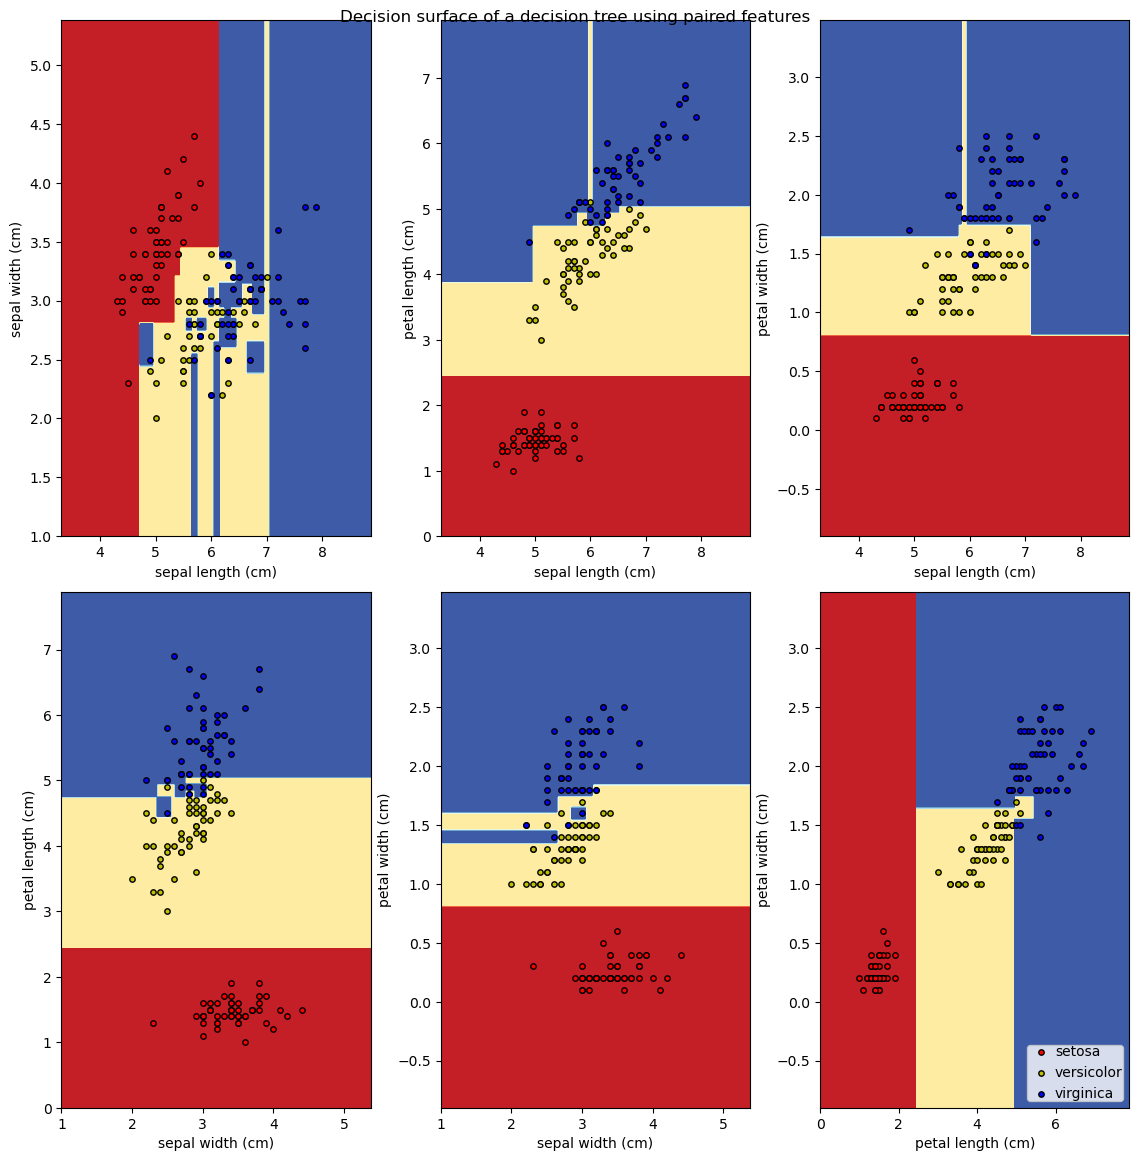

In [13]:

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()
plt.figure(figsize=(12,12))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

## Question 8
(1 pt)

Based on the plot above, **identify some regions where overfitting is occurring.**

Enter your answer in this markdown cell:
In the first and third graph, overfitting is most prominent as their is one data point of a specific type surrounded by the rest of the other data. This single data point is interferes with new data and can be classified wrong due to the overfitting.

## Question 9
(2 pt)

By default, the decision tree can be too deep, which can make it overfit. **Recreate the classifier and use the keyword ``max_depth`` in the ``DecisionTreeClassifier`` object to specify a depth for your tree. Try refitting the data. Does your accuracy score improve?**

In [14]:
# your code here
decision_tree2 = tree.DecisionTreeClassifier(max_depth = 7)
decision_tree_2 = decision_tree2.fit(x_train,y_train)

tree_pred2 = decision_tree_2.predict(x_test)
score = accuracy_score(y_test,tree_pred2)
print(score)


#for the max depth, the best accuracy score was attained of 70% within the range of a depth
#of anywhere fro 3 to 8. After 8, the accuracy score drops, which means the decision tree
#starts overfitting.

0.5925925925925926


## B2 Building a decision tree with all features

## Question 10
(4 pts)

Now that you have a sense of how the decision tree works with sklearn, **build a decision tree to classify 
irises using all the features and test it.** 

In [15]:
# your code here
iris2 = iris1.data[:,:4]

x_train_all_2, x_validate_2, y_train_all_2, y_validate_2 = model_selection.train_test_split(iris2, targets, test_size=0.1)

# now split the training data further into training and testing
x_train_2, x_test_2, y_train_2, y_test_2 = model_selection.train_test_split(x_train_all_2, y_train_all_2, test_size=0.2)


In [16]:
decision_tree3 = tree.DecisionTreeClassifier(random_state = 0, max_depth = 9)
decision_tree3 = decision_tree3.fit(x_train_2,y_train_2)

tree_pred3 = decision_tree3.predict(x_test_2)
score = accuracy_score(y_test_2,tree_pred3)
print(score)

#The decision tree with all the features improves the accuracy of the tree to 92.6%.
#Although the difference is that their is not a limit in the max depth allowed for the tree
#A depth under three reduces the accuracy but a depth over 8 does not affect the accuracy
#compared to the previous tree when using only 2 features. Have not found a cap to the 
#maximum depth allowed for the tree

0.9259259259259259


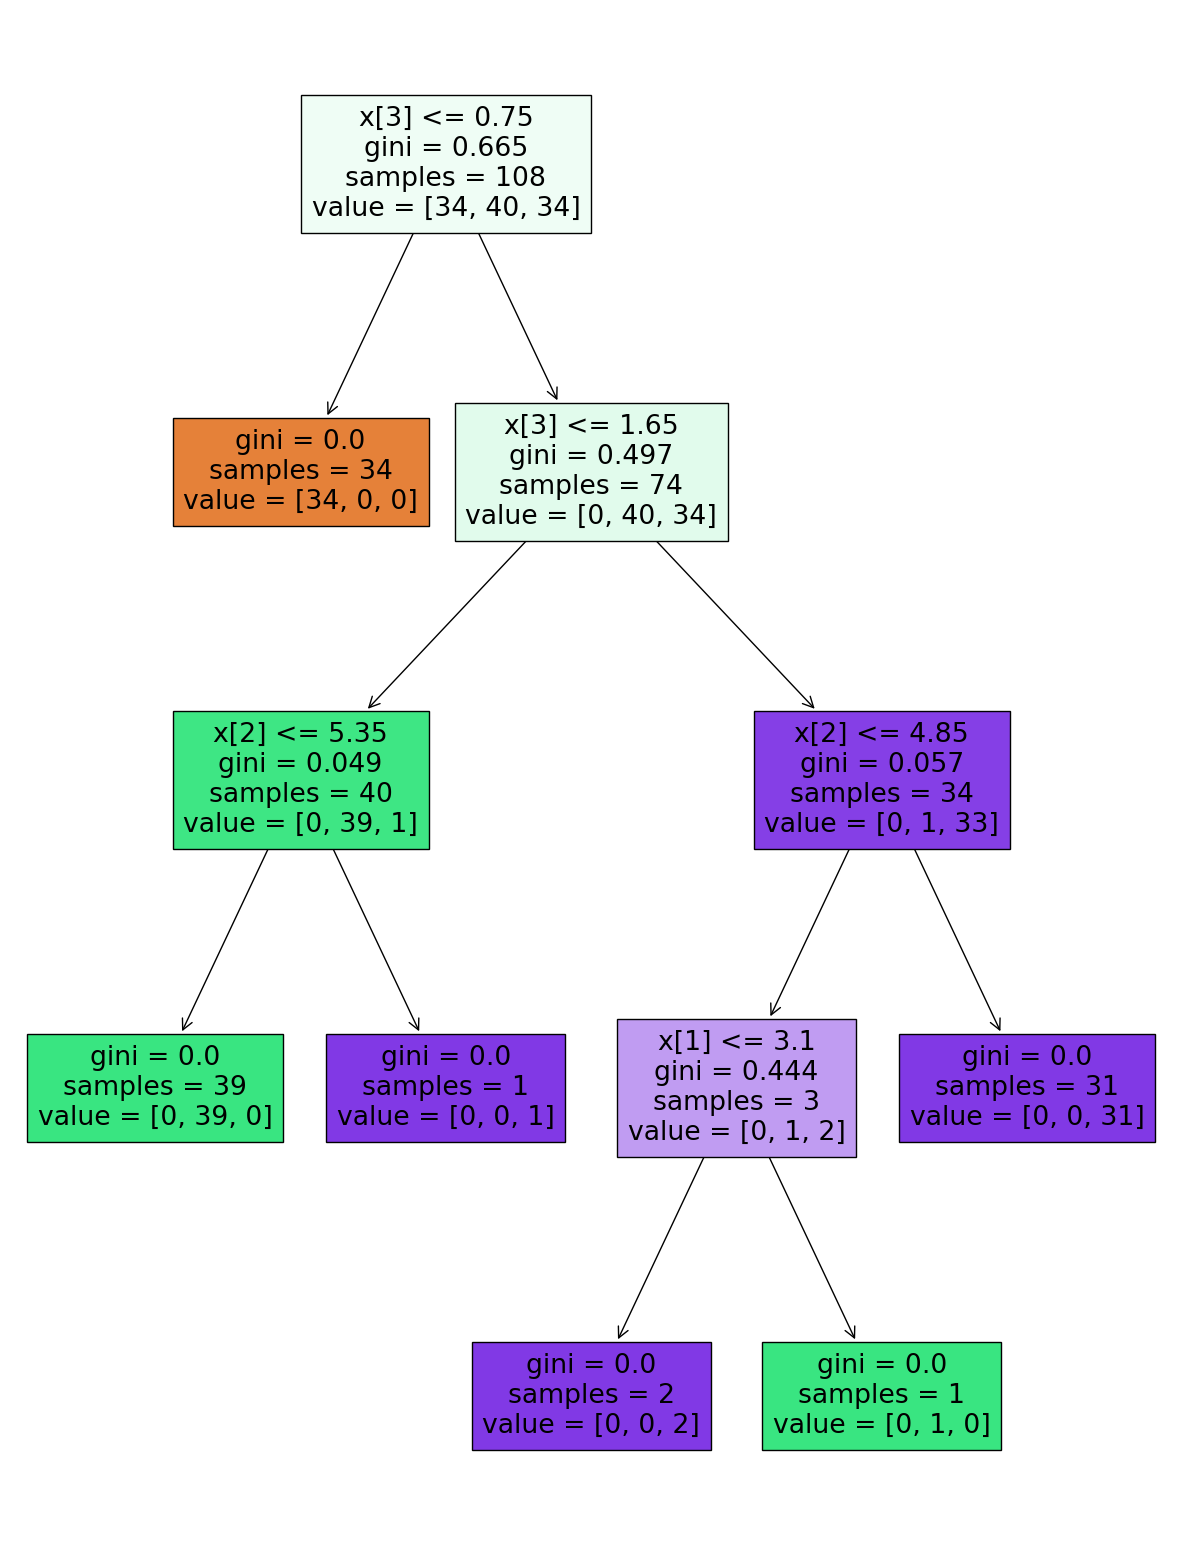

In [17]:
plt.figure(figsize=(15,20))
t = tree.plot_tree(decision_tree3,filled=True)

Question 11
(4 pts)

Based on your new tree, answer the following questions:
    
- **What feature does this tree split on? Why?**
- **What is your new accuracy score?**
- **Examine whether your score improves by changing ``max_depth``.** 
- By default, the classifer uses the Gini index to split the nodes. **What happens if you use information entropy instead?**

In [18]:
'''For some reason as I was adding information and rearranging the cells to give a better answer
Question 11 in big bold letters was erased. The following is Question 11.'''


'For some reason as I was adding information and rearranging the cells to give a better answer\nQuestion 11 in big bold letters was erased. The following is Question 11.'

In [19]:
importances = decision_tree3.feature_importances_

# Print the feature importances
for i, feature in enumerate(iris.feature_names):
    print(f"{feature}: {importances[i]}")

sepal length (cm): 0.0
sepal width (cm): 0.018575851393188854
petal length (cm): 0.03563558550355123
petal width (cm): 0.9457885631032599


In [20]:
root_feature2 = decision_tree3.tree_.feature[0]
print(iris.feature_names[root_feature2])

petal width (cm)


In [21]:
#Above are all the importances of each feature used in the decision tree. The petal width has
#highest imprtance value. This value does change everytime the notebook is ran and I can't
#seem to figure out exactly why. It could be to the fact that their is differnt testing data
#when the data split is done.

In [22]:
score = accuracy_score(y_test_2,tree_pred3)
print(score)

0.9259259259259259


In [23]:
#Using all the features, the new accuracy score is 92.6%. The score does improve when 
#changing the max depth of the tree, it stays constant. It only decreses if max depth is 
#less than 3. Any depth after 3 does not affect the accuracy of the tree.


In [24]:
#The gini index causes the tree to split on the node that is not 0. The tree stops splitting
#when the leaf nodes have reached 0. In information entropy, the tree is supposed to split
#in the highest information gain. Usually infromation entropy is used when the data 
#consists of true and false statements. Gini is used for categorial trees, which makes it
#more effective and accurate

#Using entropy instead of the Gini index can result in a different decision tree structure
#and may lead to different predictions. So, using entropy as the splitting criterion
#can lead to a decision tree that is more balanced and have smaller tree depths compared to 
#the Gini index.

# Part C - Classify handwritten digits with random forest

As discussed in lecture and readings, usually we will not make just one decision tree, but rather use an emsemble of them called a random forest. Random forests have many applications and can even be used for image recognition. In this part, we will examine how we could use random forest to classifiy handwritten digits using another classic machine learning dataset. 

This dataset is called MNIST and is used to test many machine learning models (for more information, see http://yann.lecun.com/exdb/mnist/). We'll use our usual framework for an ML workflow for this part.

## C1 Big Picture  

Optical character recognition (OCR) is a very common machine learning task that is used to digitize handwriting. There is a lot of variation in how people write, but the number of possible characters is fairly small, so it is a well defined task. For this part of the lab, we'll try to identify numbers, which means there will be 10 classes (zero to nine). 

## C2 Get the data

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()
# the data is in the form of a dictionary, this will let you see the keys

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [26]:
#converting the digits to an array:
digits_list = list(digits.values())

digits_array = np.array(digits_list)
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


/tmp/ipykernel_942/3172132285.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  digits_array = np.array(digits_list)


In [27]:
digits_array_1 = pd.DataFrame(data= np.c_[digits['data'], digits['target']],
                              columns= digits['feature_names'] + ['target'])
print(digits_array_1)

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0           0.0        0.0      

## C3 Explore the data


## Question 12
(2 pts)

Check the shape, and head, plot, visualize, and have a look at the data with whatever ways you think will help your task. Comment throughout on observations. There is some code below to look at some sample of digits

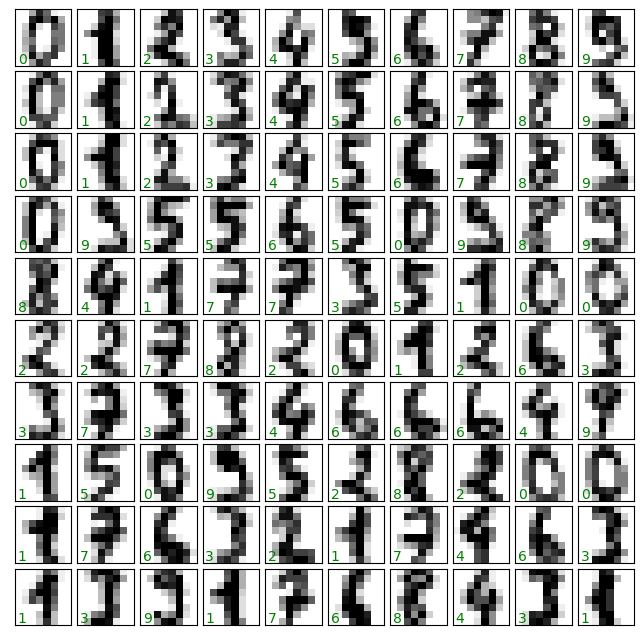

In [28]:
# We can display some of the digits to see what they look like
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
#I notice that the plot below is a 10X10 grid with the first numbers being in order but as
#you go down in rows in the figure, the numbers are no longer in order as you go down the 
#row.


In [29]:
digits_array_1.iloc[:,:64]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


## C4 Prepare Data

For this assignment, the data is already prepared and is part of the digits dictionary. No need to do anything else for this part.

## C5 Select model and train


## Question 12
(6 pts)

Here, we'll be using the pixels as features and the digit as the target. We will use the random forest classifier from sklearn to model the data. 

Remember, in this part, you'll need to :

- Split the data into training, validation, and testing
- Build a random forest classifier 
- Train the classifier 


In [30]:
# your code here
from sklearn.ensemble import RandomForestClassifier

x_train_all_3, x_validate_3, y_train_all_3, y_validate_3 = model_selection.train_test_split(digits_array_1.iloc[:,:64], digits.target, test_size=0.1)

# now split the training data further into training and testing
x_train_3, x_test_3, y_train_3, y_test_3 = model_selection.train_test_split(x_train_all_3, y_train_all_3, test_size=0.2)

print(x_train_3.shape)
print(y_train_3.shape)

(1293, 64)
(1293,)


In [31]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train_3, y_train_3)

RandomForestClassifier(random_state=0)

In [32]:
tree_pred_2 = rfc.predict(x_test_3)
score_2 = accuracy_score(y_test_3,tree_pred_2)
print(score_2)
#The random forest classifier has an accuracy of 98.1% accuracy

0.9753086419753086


### Performance / evaluation metrics

## Question 13
(6 pts)

We have mainly been using **accuracy score** as a metric for classification, but that is just one measure of how well our predictions are. For this part, let's compute some additional metrics.

- First, compute the accuracy score of your random forest classifier. 
- Compute the confusion matrix and plot it (see lab 1)
- Learn about and compute another classification metric in sklearn: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [33]:
#The accuracy score of the random forest classifier is 96.9% for the digits. It usually varies with about
#+- 2%, as previously I got 98%.

In [34]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test_3, tree_pred_2)
print(confusion)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 36  1  0  1  0]
 [ 0  0  0  0  0  0 27  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  1  0  0  1  0  1 22  1]
 [ 0  0  0  0  0  1  0  0  0 28]]


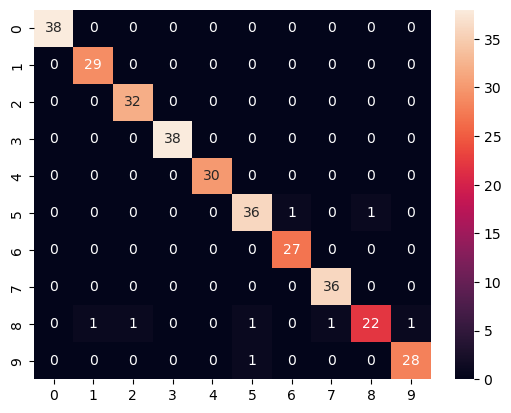

In [35]:
import seaborn as sns
sns.heatmap(confusion, annot = True);

In [36]:
from sklearn.metrics import matthews_corrcoef
math_corr = matthews_corrcoef(y_test_3, tree_pred_2)
print(math_corr)

0.9726071366639909


## 3.6 Fine tune model


## Question 14
(6 pts)

The random forest classifier has many hyper-parameters to tune that can make your classification better. Here, you'll conduct some systematic experiments in tuning hyper-parameters to see how they affect the model performance. 

- First, read the documentation for the random forest classifier to see the different hyper-parameters https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- Pick one of the hyper-parameters to tune (some examples are: ``n_estimators``, ``max_depth``, ``min_samples_leaf``, ``max_leaf_nodes``)
- Systematically vary one of these hyper-parameters and record your performance metric (for example accuracy score). Plot this relationship. 
- If you want to search multiple parameters in a grid, sklearn also has a wrapper function that is very useful called ``GridSearchCV`` https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- Discuss the results of your experiments

In [37]:
rando_forest_1 = RandomForestClassifier(random_state = 0, n_estimators = 100, max_depth = None)
rando_forest_1.fit(x_train_3,y_train_3)

rando_tree_pred1 = rando_forest_1.predict(x_test_3)
score_rando_1 = accuracy_score(y_test_3,rando_tree_pred1)
print(score_rando_1)
#I will choose to systematically vary the hyperparameter 'max_depth' because the default setting
#for the max_depth is none, which means the algorithm can chose different levels of depth in the
#tree everytime it is trained. Will be changing it by intervals of 10

0.9753086419753086


In [38]:
rando_forest_2 = RandomForestClassifier(random_state = 0, n_estimators = 100, max_depth = 10)
rando_forest_2.fit(x_train_3,y_train_3)

rando_tree_pred2 = rando_forest_1.predict(x_test_3)
score_rando_2 = accuracy_score(y_test_3,rando_tree_pred2)
print(score_rando_2)

0.9753086419753086


In [39]:
rando_forest_3 = RandomForestClassifier(random_state = 0, n_estimators = 100, max_depth = 20)
rando_forest_3.fit(x_train_3,y_train_3)

rando_tree_pred3 = rando_forest_1.predict(x_test_3)
score_rando_3 = accuracy_score(y_test_3,rando_tree_pred3)
print(score_rando_3)

0.9753086419753086


In [40]:
rando_forest_4 = RandomForestClassifier(random_state = 0, n_estimators = 100, max_depth = 30)
rando_forest_4.fit(x_train_3,y_train_3)

rando_tree_pred4 = rando_forest_4.predict(x_test_3)
score_rando_4 = accuracy_score(y_test_3,rando_tree_pred4)
print(score_rando_4)
#There seems to be no change in the accuracy score by increasing the number of depths.

0.9753086419753086


In [41]:
accuracies = []
depths = np.arange(1, 100)
for depth in depths:
    rando_forest5 = RandomForestClassifier(max_depth=depth)
    rando_forest5.fit(x_train_3, y_train_3)
    rando_forest5 = rando_forest5.predict(x_test_3)
    accuracy = accuracy_score(y_test_3, rando_forest5)
    accuracies.append(accuracy)


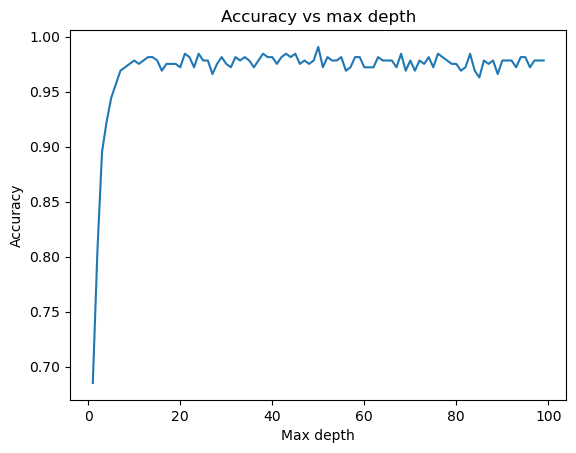

In [42]:
plt.plot(depths, accuracies)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs max depth')
plt.show()


In [43]:
#Looking at the graph, you can see that the accuracy score of the tree converges once the 
#max_depth is a depth of 5. This is why changing the hyperparameter of max_depth did not affect
#the accuracy score. To see a significant change in the accuracy score, the max depth must
#be between 0 and 5

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5,10,20,100, None]
}
rfc = RandomForestClassifier()

grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_3, y_train_3)
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [45]:
rando_grid = RandomForestClassifier(**best_params)
rando_grid.fit(x_train_3, y_train_3)
best_pred = rando_grid.predict(x_test_3)

best_accuracy = accuracy_score(y_test_3, best_pred)
print(best_accuracy)

0.9722222222222222


In [46]:
#Using the grid search did not imporve my accuracy score that much. It increased by 1% accuracy.
#The reason why th eaccuracy could have gone up is because it potentially had a different 
#'maz_depth' compared to mine.

## 3.7 Present solution

## Question 15
(4 pts)

Using the testing data that you left out in the beginning, compute your final performance metrics. Also plot the final confusion matrix. Discuss where your model is good and where the model can still be improved. 

In [47]:
# your code here
validation_data = rando_forest_4.predict(x_validate_3)
score_valid = accuracy_score(y_validate_3, validation_data)
print(score_valid)
validation_data2 = rando_grid.predict(x_validate_3)
score_valid_2 = accuracy_score(y_validate_3, validation_data2)
print(score_valid_2)

#For the extra data that was leftover, I used the validation data, as that includes data that was not included in the training
#set. I also used the classifier that was fine tuned with a random_state = 0, n_estimators = 100, and a max_depth of 15).
#This gave me an accuracy score of 98%

#The second accuracy score is for the model with the best parameters chosen by gridsearch.

0.9666666666666667
0.9611111111111111


<AxesSubplot: >

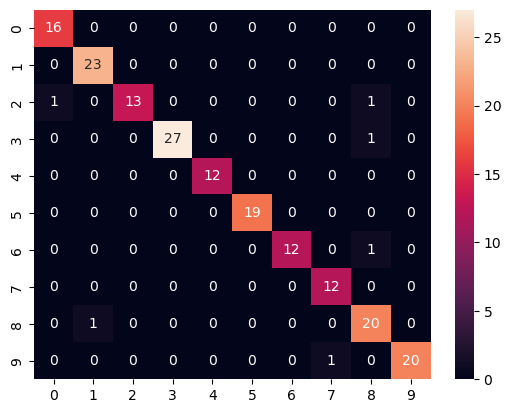

In [48]:
confusion_2 = confusion_matrix(y_validate_3, validation_data)
sns.heatmap(confusion_2, annot = True)
#Confusion matrix for the algorithm with my own hyperparameter tuning

<AxesSubplot: >

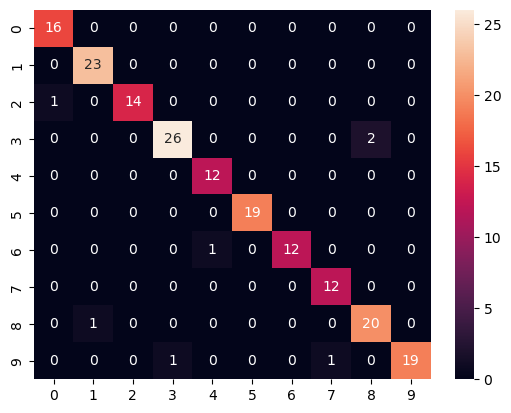

In [49]:
confusion_3 = confusion_matrix(y_validate_3, validation_data2)
sns.heatmap(confusion_3, annot = True)
#Heatmap for the algorithm with the hyperparameters chosen by gridsearch

## 3.8. Launch, Monitor and Maintain

Nothing to here for this lab. 

# Part D - Machine Learning in Particle Physics


## D1 - The Big Picture 

In this part, you will build a random forest machine learning model to recongnize types creating of top-quarks in a particle accelarator based on the observed products. We can use the decay products, energy, and momentum vectors to infer the presense of top-quarks. Beyond Standard Model Particle physics models often predict new types of particles so knowing whether the number of top-quarks (which have very high energy compared to other quarks) are as expected can be important for identifying when the Standard Model breaks down. 

Before you begin this experiment, read more about the dataset in Chapter 4, Section 4.1 of the Machine Learning for Physics and Astronomy in the PDF in the lab directory (also on Bruinlearn). 



## D2 - Get the Data

The dataset is included here in `ParticleID_features.csv`, the target is in `'ParticleID_labels.txt`. Our goal is to differentiate between the `4-top` events (Interactions of 4 top quark) from the `ttbar` events (interaction of top and anti-top quarks background events). 

In [50]:
## get the data
import pandas as pd
features = pd.read_csv('ParticleID_features.csv')
targets = pd.read_csv('ParticleID_labels.txt',header=None)

## D3 - Explore the data

In this lab, you have the freedom to decide what features you would like to use to train your model and how to clean and inpute your data. 

To help guide you, be sure to answer the following questions about the data. Read Chapter 4, Section 4.1 and 4.3 of the included PDF to learn more and get ideas of how to deal with cleaning the data and selecting good features to use. This chapter also has helpful pandas and sklearn code that will help make some of these tasks easier. Use the ``features.describe()`` to see the statistics of the columns of the ``features`` table. 

## Question 16
(4 pts)

1. What are the columns and what do they mean?
2. Why do some columns have more NaN's than others? 
3. Examine your target classes. What is the distribution of the number of training samples for the two classes? 
4. Make plots to explore some of the features that you are interested in using. 



In [51]:
#MET and METphi represents the missing energy during the collision. They contain the magnitude 
#and the azimuthal angle of the missing transverse energy vector of the event, respectively.

#The Type_X column represent the 13 particles that were measured during the event. 
#The columns labeled P represent the energy quadrivector. They are divided into sets of 3. 
#So it followes: Type_1 and the following 3 P's represent its energy quadrivector. Then the next
#Particel, along with its 3 Ps, etc.

#The targets column represents the process which generated the event, which can be either
#'4top' or 'ttbar'

In [52]:
#The reason why there are so many NaN's is because each event has a variable amount of particles
#produced in the reaction, which leads to a variable amount of available features.

In [53]:
features.head()

,ID,MET,METphi,Type_1,P1,P2,P3,P4,Type_2,P5,...,Type_12,P45,P46,P47,P48,Type_13,P49,P50,P51,P52
0,0,62803.5,-1.810010,j,137571.0,128444.0,-0.345744,-0.307112,j,174209.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,57594.2,-0.509253,j,161529.0,80458.3,-1.318010,1.402050,j,291490.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,82313.3,1.686840,b,167130.0,113078.0,0.937258,-2.068680,j,102423.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,30610.8,2.617120,j,112267.0,61383.9,-1.211050,-1.457800,b,40647.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,45153.1,-2.241350,j,178174.0,100164.0,1.166880,-0.018721,j,92351.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
print(features.size)
print(features.shape)

340000
(5000, 68)


<AxesSubplot: >

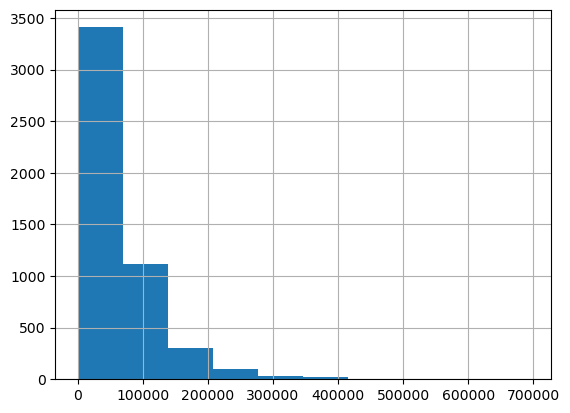

In [55]:
#plt.plot(features.iloc[:,2],features.iloc[:,5])
features['MET'].hist()

<AxesSubplot: >

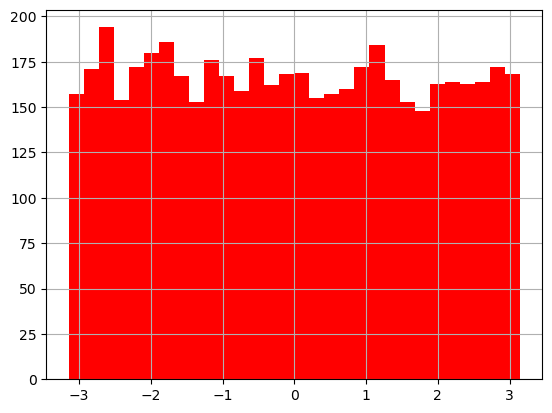

In [56]:
features['METphi'].hist(color='r', bins = 30)

<AxesSubplot: >

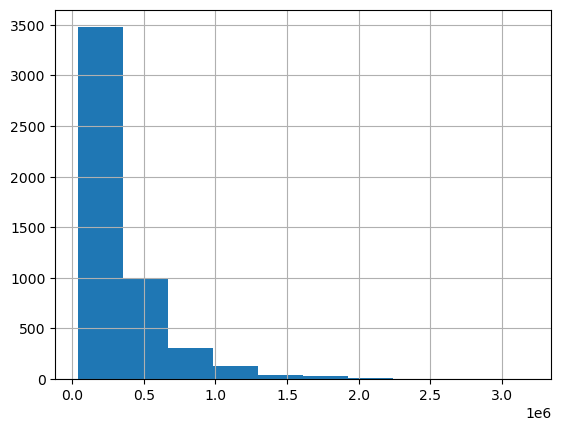

In [57]:
features['P1'].hist(bins = 10)

In [58]:
features.describe(include='all')

,ID,MET,METphi,Type_1,P1,P2,P3,P4,Type_2,P5,...,Type_12,P45,P46,P47,P48,Type_13,P49,P50,P51,P52
count,5000.000000,5000.000000,5000.000000,5000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,4997,4.997000e+03,...,127,1.270000e+02,127.000000,127.000000,127.000000,56,5.600000e+01,56.000000,56.000000,56.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,7,NaN,...,6,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,j,NaN,NaN,NaN,NaN,j,NaN,...,j,NaN,NaN,NaN,NaN,j,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,3239,NaN,NaN,NaN,NaN,3321,NaN,...,85,NaN,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN
mean,2499.500000,64071.074332,-0.028916,NaN,3.301357e+05,1.540486e+05,-0.039812,-0.003049,NaN,2.527799e+05,...,NaN,1.631051e+05,34876.849606,0.206978,-0.001085,NaN,1.456600e+05,36151.183929,-0.000879,0.219260
std,1443.520003,60525.122480,1.819257,NaN,3.068202e+05,1.149469e+05,1.361762,1.814855,NaN,2.638580e+05,...,NaN,2.248603e+05,20433.767238,1.998859,1.949004,NaN,1.943657e+05,25861.883410,1.941707,1.910400
min,0.000000,290.756000,-3.141010,NaN,3.857940e+04,2.825400e+04,-4.110220,-3.140710,NaN,1.087540e+04,...,NaN,1.780380e+04,12987.900000,-4.447660,-3.139820,NaN,2.512510e+04,14836.000000,-4.448760,-2.990730
25%,1249.750000,24352.375000,-1.619905,NaN,1.369522e+05,8.883690e+04,-1.035570,-1.574213,NaN,1.007510e+05,...,NaN,4.365005e+04,24742.500000,-1.259230,-1.817600,NaN,4.112588e+04,24974.125000,-1.243362,-1.490900
50%,2499.500000,46814.400000,-0.055612,NaN,2.263525e+05,1.182015e+05,-0.038731,-0.009037,NaN,1.659740e+05,...,NaN,8.050910e+04,28262.800000,0.120301,-0.232455,NaN,9.553645e+04,27353.550000,-0.121213,0.128103
75%,3749.250000,83032.350000,1.537323,NaN,4.077158e+05,1.771265e+05,0.943598,1.542370,NaN,2.999950e+05,...,NaN,1.578350e+05,35445.700000,1.727295,1.712720,NaN,1.754910e+05,33817.950000,1.800682,1.984745


In [59]:
targets

,0
0,ttbar
1,ttbar
2,ttbar
3,ttbar
4,ttbar
...,...
4995,4top
4996,ttbar
4997,ttbar
4998,4top


In [60]:
print(targets.shape)

(5000, 1)


## D4 - Prepare the Data

Here, you'll be selecting the features and creating your training, testing, and validating data. Again, Chapter 4, Section 4.1 and 4.3 will be helpful for this. 

## Question 17
(6 pts)

1. Choose at least 5 features to use in your random forest model and justfy why you think these are helpful features.
2. Do you need to clean these features? Are there invalid or missing values that you need to deal with? If so describe your method for dealing with them. 
3. Split your dataset into training, testing, and validation. You are free to choose what fraction you would like to use for each. 


In [61]:
features

,ID,MET,METphi,Type_1,P1,P2,P3,P4,Type_2,P5,...,Type_12,P45,P46,P47,P48,Type_13,P49,P50,P51,P52
0,0,62803.5,-1.810010,j,137571.0,128444.0,-0.345744,-0.307112,j,174209.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,57594.2,-0.509253,j,161529.0,80458.3,-1.318010,1.402050,j,291490.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,82313.3,1.686840,b,167130.0,113078.0,0.937258,-2.068680,j,102423.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,30610.8,2.617120,j,112267.0,61383.9,-1.211050,-1.457800,b,40647.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,45153.1,-2.241350,j,178174.0,100164.0,1.166880,-0.018721,j,92351.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,269074.0,-1.274730,j,495577.0,362590.0,-0.791914,1.671250,b,328278.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,4996,12385.8,0.986871,j,258932.0,133559.0,-1.276540,2.970100,j,87822.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,4997,32762.8,3.057630,b,122222.0,79947.8,0.983920,-0.399231,j,260623.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,4998,104474.0,-1.875250,b,791028.0,457589.0,1.141530,2.934810,b,304661.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#I will be choosing all the features as their are really only 5 features. The features being used
#are MET, METphi, Object Type, all the energy quadri-vector

#For the missing NaN's, I have replaced it with the most occuring value for each column 
#since the data is mainly numeric.
#Cleaned up my previous code by creating loops and relpacing all the string variables such as 
#'j', 'e+', into numerical values so that the classifier can be trained. The stirngs had to be 
#to be replaced by floats. 

In [63]:
target_vals = np.where(targets == 'ttbar', '0','1')


In [64]:
for i in features.columns:
    features[i].fillna(features[i].mode()[0], inplace = True)
    

In [65]:
replacements = {'j': '0', 'b': '1', 'e+': '2', 'e-': '3', 'm+': '4', 'm-': '5', 'g': '6'}

for old, new in replacements.items():
    features = features.replace(old, new)

print(features)

        ID       MET    METphi Type_1        P1        P2        P3        P4  \
0        0   62803.5 -1.810010      0  137571.0  128444.0 -0.345744 -0.307112   
1        1   57594.2 -0.509253      0  161529.0   80458.3 -1.318010  1.402050   
2        2   82313.3  1.686840      1  167130.0  113078.0  0.937258 -2.068680   
3        3   30610.8  2.617120      0  112267.0   61383.9 -1.211050 -1.457800   
4        4   45153.1 -2.241350      0  178174.0  100164.0  1.166880 -0.018721   
...    ...       ...       ...    ...       ...       ...       ...       ...   
4995  4995  269074.0 -1.274730      0  495577.0  362590.0 -0.791914  1.671250   
4996  4996   12385.8  0.986871      0  258932.0  133559.0 -1.276540  2.970100   
4997  4997   32762.8  3.057630      1  122222.0   79947.8  0.983920 -0.399231   
4998  4998  104474.0 -1.875250      1  791028.0  457589.0  1.141530  2.934810   
4999  4999   65623.8 -0.817535      1  145360.0  138746.0  0.236765  2.277120   

     Type_2        P5  ... 

In [66]:
#First step is to split the data into testing and training data
x_train_all_p, x_validate_particle, y_train_all_p, y_validate_particle = model_selection.train_test_split(features, target_vals, test_size=0.3)



x_train_particle, x_test_particle, y_train_particle, y_test_particle = model_selection.train_test_split(x_train_all_p, y_train_all_p, test_size=0.1)



print(x_train_particle.shape,y_train_particle.shape)
print(x_test_particle.shape,y_test_particle.shape)

print(x_validate_particle.shape,y_validate_particle.shape)

(3150, 68) (3150, 1)
(350, 68) (350, 1)
(1500, 68) (1500, 1)


## D5 - Select model and train

## Question 18
(3 pts)

Use a random forest classifier to train a model to classify `4-top` and ``ttbar`` events. 

In [67]:
rando_forest_particle = RandomForestClassifier(random_state = 0, max_depth = 25)
rando_forest_particle.fit(x_train_particle, y_train_particle)

particle_pred = rando_forest_particle.predict(x_test_particle)
score_particle = accuracy_score(y_test_particle, particle_pred)
print(score_particle)

/tmp/ipykernel_942/3083347206.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rando_forest_particle.fit(x_train_particle, y_train_particle)


0.9485714285714286


## Performance and evaluation metrics


## Question 19
(6 pts)

- First, compute the accuracy score of your random forest classifier. Based on the ratio of ``4-top`` samples compared to the ``ttbar`` class, what accuracy would you expect if you always guess ``ttbar``?
- Use ``sklearn.metrics.classification_report`` to compute some other common metrics. Descibe what each metric means. 
- Compute the confusion matrix and plot it.

In [68]:
#The accuracy score attained with the above random forest classifier is 92.6%, which 
#predicts whether it is ttbar or 4-top event.
rate_ttbar = np.where(targets == 'ttbar')
rate = np.array(rate_ttbar)
print(rate[0].size)

ttbar = rate[0].size/targets.size

print(ttbar)

#If you are to always guess ttbar, you will get an accuracy score of 83% becuase that the percentage
#of ttbar in the targets data.

4189
0.8378


In [69]:
from sklearn.metrics import classification_report
target_names = ['4-top', 'ttbar']
print(classification_report(y_test_particle, particle_pred, target_names = target_names))

              precision    recall  f1-score   support

       4-top       0.96      0.98      0.97       292
       ttbar       0.88      0.79      0.84        58

    accuracy                           0.95       350
   macro avg       0.92      0.89      0.90       350
weighted avg       0.95      0.95      0.95       350



In [70]:
#These metrics in the classification report are calculated by the True Positive(TP), 
#TN, FP, and FN
#Precision is (TP/(TP + FP)), this represents the number of prediction that were correct
#Recall represents the percentages of positive cases that the algorithm caught
#f1-score is the percentage of positive predictions that were correct

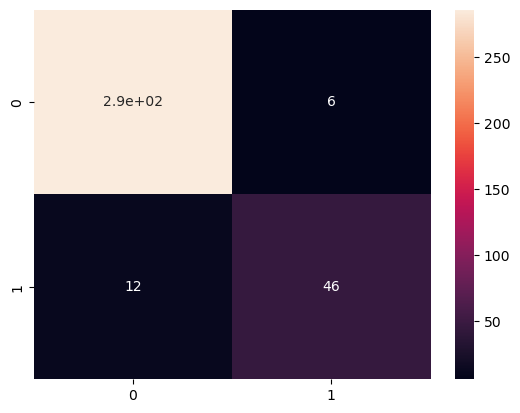

In [71]:
confusion_particle = confusion_matrix(y_test_particle, particle_pred)
sns.heatmap(confusion_particle, annot = True);

## D6 - Fine tune your model

## Question 20
(6 pts)

Re-run your random forest classifier with other choices for hyper-parameters. Are there better choies of hyper-parameters? Describe your final model and justify your choices. 

In [72]:
rando_forest_particle = RandomForestClassifier(random_state = 0, max_depth = 25, n_estimators = 100)
rando_forest_particle.fit(x_train_particle, y_train_particle)

particle_pred = rando_forest_particle.predict(x_test_particle)
score_particle = accuracy_score(y_test_particle, particle_pred)
print(score_particle)

/tmp/ipykernel_942/4154428944.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rando_forest_particle.fit(x_train_particle, y_train_particle)


0.9485714285714286


In [73]:
#After changing the hyperparameters and adding new ones, the best accuracy score that was achieved
#is still the same one as the original classifier. I kept the random_state at 0 because
#that gave the best result when keeping the other parameters constant. For max_depth, after 
#25, the accuracy score stayed the same so their was no point in going higher.
#I set the n_estimators the same as the max_depth as they are pretty much almost the same thing


## D7 - Present your solution


## Question 21
(6 pts)

Describe the performance of your model on the validation data set. Describe two improvements that one could make in this work in the future (for example how to improve: data collection, feature engineering, data cleaning, model buiding, etc.). 

In [74]:
particle_pred_val = rando_forest_particle.predict(x_validate_particle)
score_val = accuracy_score(y_validate_particle, particle_pred_val)
print(score_particle)

0.9485714285714286


In [75]:
#The accuracy of the validation data increased when compared to the testing data
#1. The first and biggest improvement that I believe can be done is the way I deal with the 
#missing data. In the book ML for Physics and Astro, in chapter 4 they created a ML algorithm 
#within the ML algortithm in order to fill in the missing NaN points. The model is trained from 
#given data in order to predict the missing data. This will ultimately give better data for training
#the RandomForestClassifier as opposed to just filling in the missing data points with the mean or 
#the most occured number for its corresponding column.

In [76]:
#2. The second thing I would improve in a new model is training the model with less features
#(less data), but has high correlation with eachother. This will improve the run time and the 
#accuracy of the RandomForestClassifier.

# Submit your lab

You're done! Congrats!